In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv("../Data/Advertising.csv")

df.drop("Unnamed: 0", axis=1, inplace=True) # Dropping unnamed 0


# EDA - Exploratory data analysis

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [63]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [64]:
df.shape # 200 samples, 3 features, 1 label (label is sales)

(200, 4)

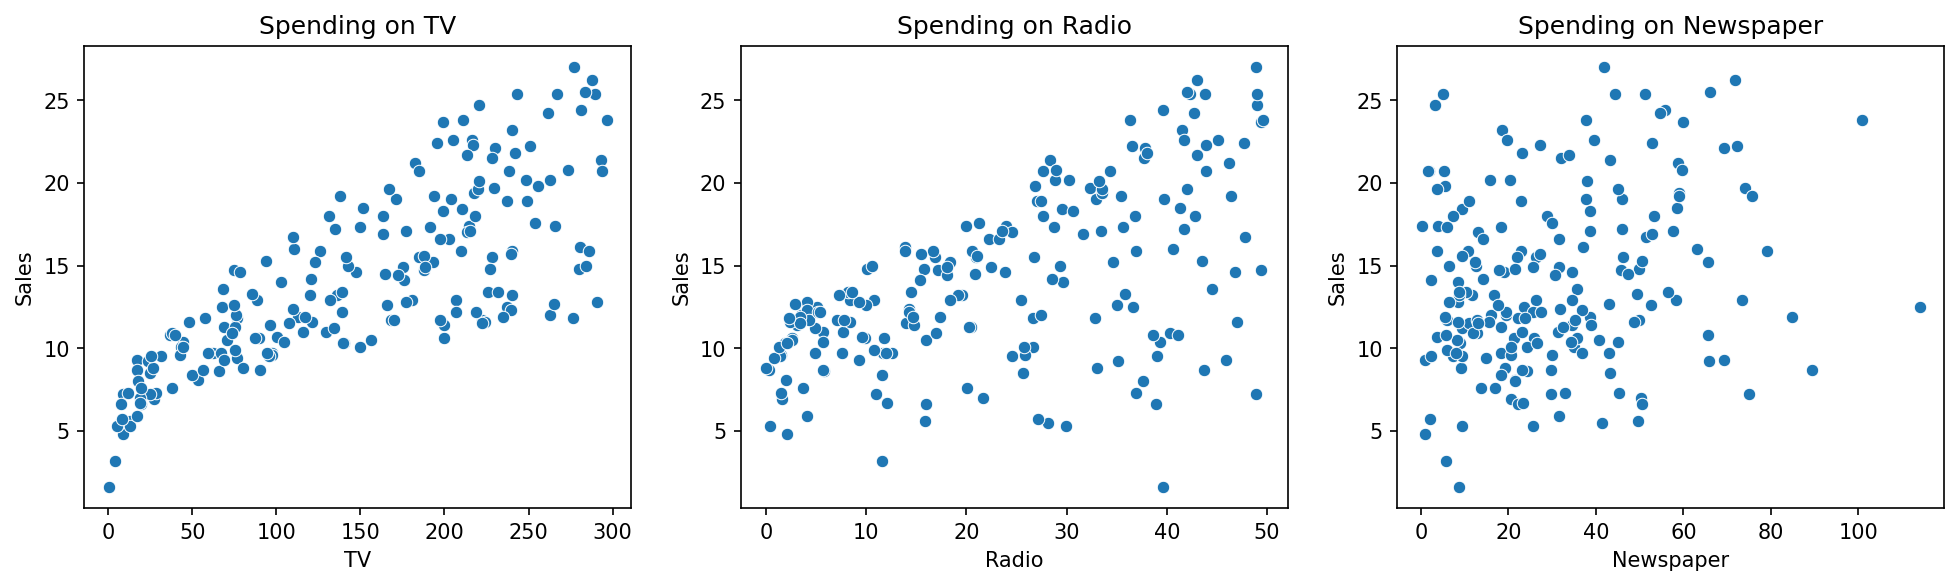

In [65]:
number_features = df.shape[1]-1

fig, ax = plt.subplots(1, number_features, figsize = (16,4),dpi = 150)

for i, feature in enumerate(df.columns[:-1]): # Enumerate simply assignes a value to every feature, No need to have a count variable.
    sns.scatterplot(data = df, x = feature, y ="Sales", ax=ax[i])
    ax[i].set_title(f"Spending on {feature}")

## Simple linear regression

In [66]:
X, y = df["TV"], df["Sales"]

print(X) # Series object.
print(y) # also a series object

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64
0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64


In [67]:
beta_1, beta_0 = np.polyfit(X,y, deg=1) # Returns a vector of coefficients "p" that minimises the squared error.
# degree 1 = simple regression, degree >2 = multiple regression
# See polyfit as OLS

print(f"{beta_0 = }\n{beta_1 = }")

beta_0 = 7.032593549127696
beta_1 = 0.04753664043301972


[Text(0.5, 1.0, 'Regression line on TV advertisement spending')]

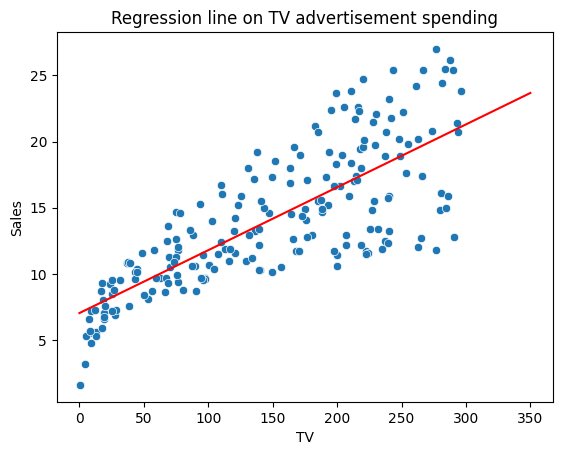

In [69]:
y_hat = lambda x: beta_0 + beta_1*x # function for calculating y_hat using beta0 and beta 1

spending = np.linspace(0, 350) # Returns evenly spaced number between the START value 0 and END value 350
# 350 is chosen because we know from plotting "TV" and "SALES" that they go up to 300


ax = sns. scatterplot(data = df, x= "TV", y = "Sales")
sns.lineplot(x = spending, y=y_hat(spending), color = "red") # line is based on beta_0 and beta_1
ax.set(title = "Regression line on TV advertisement spending")

<Axes: xlabel='TV', ylabel='Sales'>

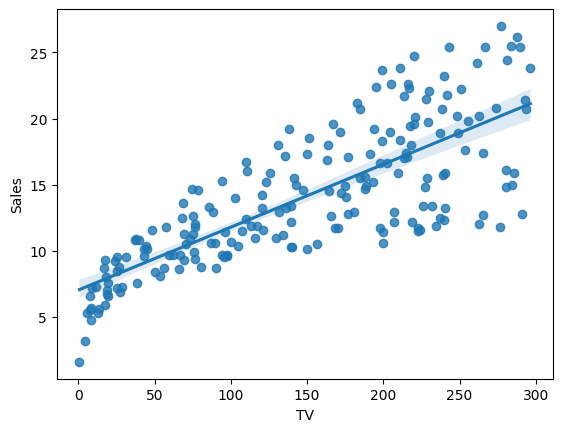

In [71]:
sns.regplot(x=X,y=y) # Easier way to do the same thing as above,